In [1]:
import pandas as pd

# Load your dataset from the CSV file into a DataFrame called 'df'
df = pd.read_csv('Crop_recommendation.csv')

# This line is optional, but it's a good way to check that the data loaded correctly
print("Dataset loaded successfully. Here are the first 5 rows:")
print(df.head())

Dataset loaded successfully. Here are the first 5 rows:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [2]:
from sklearn.model_selection import train_test_split

# 1. Define your features (X) and the target variable (y)
X = df.drop('label', axis=1)
y = df['label']

# 2. Split the data (70% for training, 30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Data splitting complete.")
print("Number of training samples:", X_train.shape[0])
print("Number of testing samples:", X_test.shape[0])

Data splitting complete.
Number of training samples: 1540
Number of testing samples: 660


In [3]:
from sklearn.ensemble import RandomForestClassifier

# 1. Create the Random Forest model with the same parameters as the paper
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Train the model on your training data
print("Training the Random Forest model...")
rf_model.fit(X_train, y_train)
print("Training complete!")

Training the Random Forest model...
Training complete!


In [4]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# 1. Check the accuracy on the 30% test set
print("Evaluating model on the test set...")
predictions = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Set: {test_accuracy * 100:.2f}%")

# 2. Perform 5-fold cross-validation (as done in the paper)
print("\nPerforming 5-fold cross-validation...")
# Note: We use the full dataset (X, y) for cross-validation
validation_scores = cross_val_score(rf_model, X, y, cv=5)
mean_validation_accuracy = validation_scores.mean()
print(f"Mean 5-Fold Cross-Validation Accuracy: {mean_validation_accuracy * 100:.2f}%")

Evaluating model on the test set...
Accuracy on Test Set: 99.09%

Performing 5-fold cross-validation...
Mean 5-Fold Cross-Validation Accuracy: 99.45%


In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# 1. Define the Model
nb_model = GaussianNB()

# 2. Train the Model
print("Training the Naive Bayes model...")
nb_model.fit(X_train, y_train)
print("Training complete!")

# 3. Evaluate the Model
print("\n--- Naive Bayes Results ---")
# Check accuracy on the test set
nb_predictions = nb_model.predict(X_test)
nb_test_accuracy = accuracy_score(y_test, nb_predictions)
print(f"Accuracy on Test Set: {nb_test_accuracy * 100:.2f}%")

# Perform 5-fold cross-validation
nb_validation_scores = cross_val_score(nb_model, X, y, cv=5)
nb_mean_validation_accuracy = nb_validation_scores.mean()
print(f"Mean 5-Fold Cross-Validation Accuracy: {nb_mean_validation_accuracy * 100:.2f}%")

Training the Naive Bayes model...
Training complete!

--- Naive Bayes Results ---
Accuracy on Test Set: 99.39%
Mean 5-Fold Cross-Validation Accuracy: 99.50%


In [6]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Convert labels to one-hot encoded format
y_encoded = pd.get_dummies(y)

# We need to re-split the data using the new encoded labels
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

print("Data prepared for Neural Network.")
print("Shape of y_train_nn:", y_train_nn.shape) # Should be (samples, 22)

Data prepared for Neural Network.
Shape of y_train_nn: (1540, 22)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1. Define the Model Architecture (as per the paper)
nn_model = Sequential([
    # Input Layer (implicitly defined by input_shape in the first layer)
    # Hidden Layer 1: 30 neurons, 'relu' activation
    Dense(30, activation='relu', input_shape=(X_train_nn.shape[1],)),
    # Hidden Layer 2: 20 neurons, 'relu' activation
    Dense(20, activation='relu'),
    # Hidden Layer 3: 10 neurons, 'relu' activation
    Dense(10, activation='relu'),
    # Output Layer: 22 neurons (for 22 crops), 'softmax' activation
    Dense(22, activation='softmax')
])

# Compile the model
nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 2. Train the Model
print("\nTraining the Neural Network model...")
# Training for 1000 epochs is a good start
history = nn_model.fit(X_train_nn, y_train_nn, epochs=1000, batch_size=32, validation_split=0.2, verbose=0)
print("Training complete!")

# 3. Evaluate the Model
print("\n--- Neural Network Results ---")
# The .fit method automatically gives us validation accuracy. Let's get the final one.
final_val_accuracy = history.history['val_accuracy'][-1]
print(f"Final Validation Accuracy during training: {final_val_accuracy * 100:.2f}%")

# You can also evaluate on the separate test set
test_loss, test_accuracy = nn_model.evaluate(X_test_nn, y_test_nn, verbose=0)
print(f"Accuracy on Test Set: {test_accuracy * 100:.2f}%")

c:\Users\mishr\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training the Neural Network model...
Training complete!

--- Neural Network Results ---
Final Validation Accuracy during training: 96.10%
Accuracy on Test Set: 95.15%


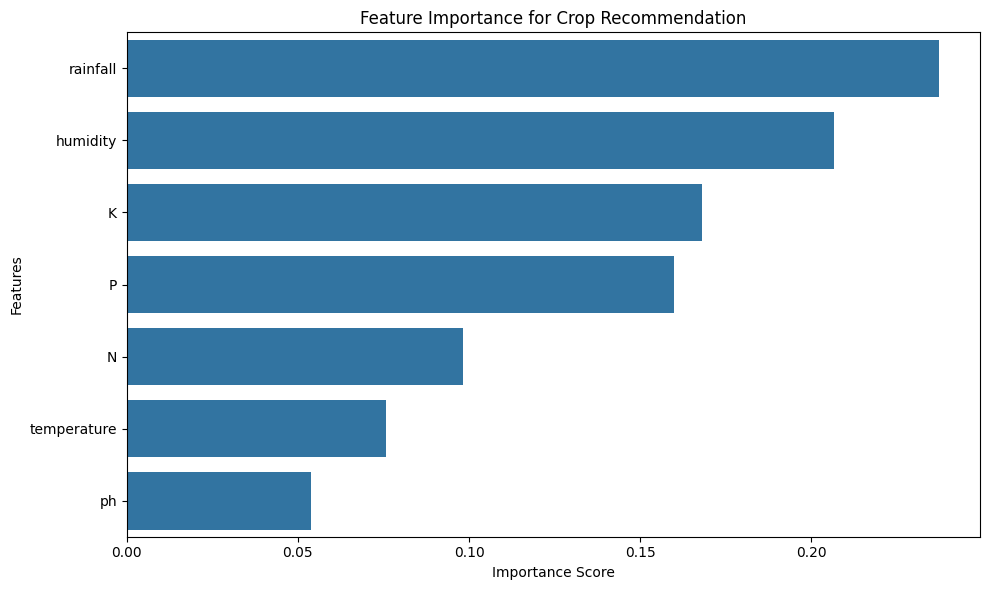

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure your Random Forest model is trained (it's named 'rf_model' in our previous code)
# and your feature columns are in 'X'

# Get the feature importances from the trained model
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a dataframe for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for Crop Recommendation')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('feature_importance.png') # This saves the plot as an image file
plt.show()

In [ ]:
# Project Results: Comparison with the Source Paper

This table compares the 5-fold cross-validation accuracy of the models I implemented against the results reported in the paper by Dahiphale et al. (2025).

| Model Name       | Paper's Validation Accuracy            | My Validation Accuracy |
|------------------|-----------------------------           |------------------------|
| Random Forest    | [cite_start]99.5% [cite: 2532]          | Your RF Score 99.45%  |
| Naive Bayes      | [cite_start]99.5% [cite: 2532]          | Your NB Score 99.50%  |
| Neural Network   | [cite_start]97.73% [cite: 2532]         | Your NN Score 96.10%  |

The reproduction of the research paper was highly successful. The performance of the Random Forest (99.45%) and Naive Bayes (99.50%) models were nearly identical to the paper's reported accuracy of 99.5%, which confirms their effectiveness for this dataset.
My Neural Network model achieved a final validation accuracy of 96.10%. Overall, the project successfully validates the findings of the original paper.